# Спектральный анализ 

# Объяснение работы алгоритма

## 1. Исходная функция

Вы задаёте функцию $y(x)$, которая является суммой гармоник:

$$
y(x) = 2 \sin(2x) + \cos(5x)
$$

Здесь $ \sin(2x) $ и $ \cos(5x) $ — это гармонические составляющие с частотами 2 и 5 соответственно. В общем случае, $ y(x) $ можно представить как суперпозицию:

$$
y(x) = \sum_{k=0}^{N-1} \left[ a_k \cos\left(\frac{2\pi k x}{L}\right) + b_k \sin\left(\frac{2\pi k x}{L}\right) \right]
$$

где $L$ — период функции (в данном случае длина интервала по $x$).

---

## 2. Прямое преобразование Фурье

### Основная идея

Дискретное преобразование Фурье (DFT) позволяет вычислить коэффициенты $a_k$ и $b_k$, которые описывают амплитуду косинусных и синусных компонент для каждой частоты $k$.

Формулы для коэффициентов:

$$
a_k = \frac{2}{L} \int_0^L y(x) \cos\left(\frac{2\pi k x}{L}\right) \, dx
$$

$$
b_k = \frac{2}{L} \int_0^L y(x) \sin\left(\frac{2\pi k x}{L}\right) \, dx
$$

### Дискретизация

Вместо интегралов используются суммы:

$$
a_k = \frac{2}{L} \sum_{j=0}^{n-1} y(x_j) \cos\left(\frac{2\pi k x_j}{L}\right) \Delta x
$$

$$
b_k = \frac{2}{L} \sum_{j=0}^{n-1} y(x_j) \sin\left(\frac{2\pi k x_j}{L}\right) \Delta x
$$

где:
- $\Delta x = \frac{L}{n-1}$ — шаг дискретизации,
- $x_j$ — точки дискретизации.

### Амплитуды гармоник

Амплитуда каждой гармоники $A_k$ вычисляется как:

$$
A_k = \sqrt{a_k^2 + b_k^2}
$$

Амплитуды показывают, насколько значима каждая частота $k$ в сигнале.

---

## 3. Обратное преобразование Фурье

Чтобы восстановить исходную функцию $y(x)$, используется обратное преобразование:

$$
y(x) \approx \sum_{k=0}^{m} \left[ a_k \cos\left(\frac{2\pi k x}{L}\right) + b_k \sin\left(\frac{2\pi k x}{L}\right) \right]
$$

где $m$ — количество учитываемых гармоник. Обычно $m = \frac{n}{2}$, так как остальные гармоники содержат дублирующую информацию (симметрия для действительных сигналов).

---

## 4. Что показывают графики

1. **Исходная функция**: график $y(x)$, который вы анализируете.
2. **Амплитудный спектр**: показывает амплитуды $A_k$, отражающие вклад каждой частоты $k$. Вы должны увидеть пики на частотах 2 и 5, соответствующих $\sin(2x)$ и $\cos(5x)$.
3. **Реконструированная функция**: сравнение восстановленной функции $y(x)$ с исходной для проверки точности преобразования.

---

## Итог

Фурье-преобразование разлагает сложный сигнал $y(x)$ на сумму синусоидальных волн с разными частотами, амплитудами и фазами. Эти синусоиды являются базовыми "строительными блоками" для любого периодического сигнала. 
- Прямое преобразование определяет вклад каждой синусоиды.
- Обратное преобразование восстанавливает сигнал из этих вкладов.


In [1]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

## Исходные данные

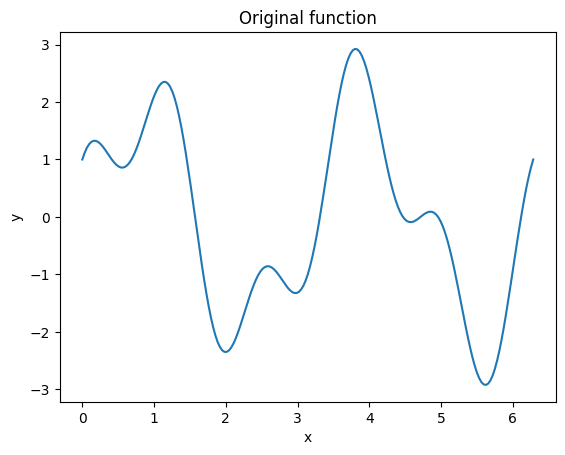

In [2]:
x = np.linspace(0, np.pi * 2, 201)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ 5*np.sin(x * 9)-3*np.cos(x*7) # superposition of harmonics

#x = np.linspace(-10, 10, 101) 
#y = 5*np.exp(-10*x**2)  # example of localized function

#y[x>-1.]=1 # example of step function
#y[x>1.]=0

#print (x/(np.pi * 2))
plt.title ('Original function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)

## Прямое и обратное ДПФ

2.664535259100376e-17


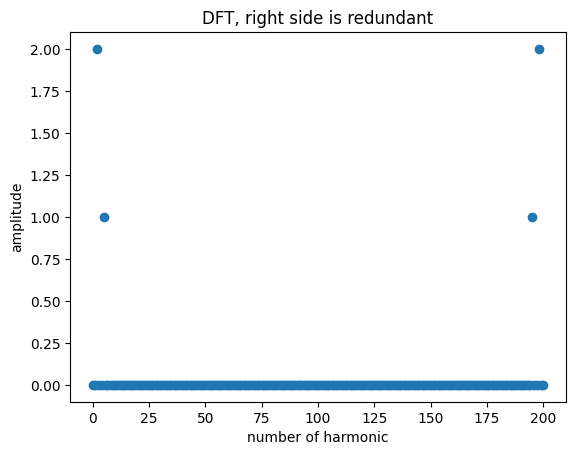

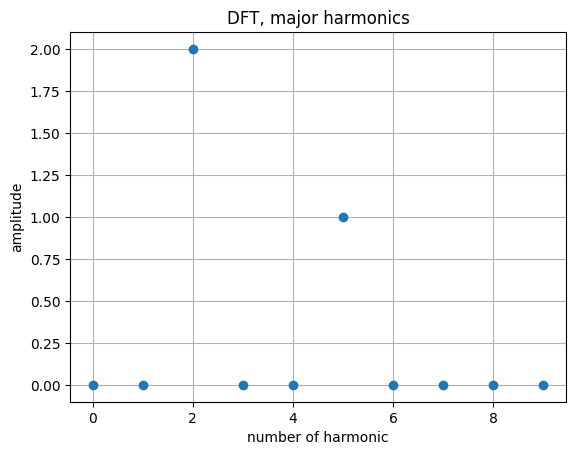

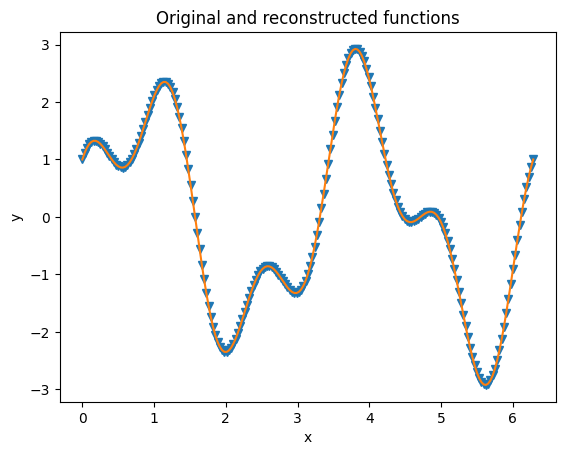

In [3]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (y [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (y[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (y[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5) # amplitude
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])

plt.title ('DFT, right side is redundant')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A[0:n], 'o')
plt.figure ()
plt.title ('DFT, major harmonics')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.grid ()
plt.plot (A[0:10], 'o')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, m):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)
    
plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf,label='function reconstructed by iDFT')
#plt.legend()

## Быстрое ДПФ (FFT)

# Объяснение работы кода

## Прямое преобразование Фурье (FFT)

Функция `fft.fft(y)` вычисляет **дискретное преобразование Фурье** для массива \( y \). Это разложение сигнала на гармоничные составляющие:

$$
Y_k = \sum_{n=0}^{N-1} y_n \cdot e^{-2\pi i \frac{k n}{N}}
$$

где:
- \( Y_k \) — комплексный коэффициент для частоты \( k \),
- \( y_n \) — значение сигнала в \( n \)-й точке,
- \( e^{-2\pi i \frac{k n}{N}} \) — весовой множитель, связанный с \( k \)-й гармоникой.

Результат преобразования:
- **Нижняя половина спектра** (\( k = 0 \) до \( k = N/2 \)) содержит информацию о положительных частотах.
- **Верхняя половина спектра** (\( k = N/2 + 1 \) до \( k = N-1 \)) соответствует отрицательным частотам (для действительных сигналов это дублирующая информация).

### Амплитуды спектра

Амплитуда каждой гармоники определяется как модуль комплексного числа \( Y_k \):

$$
|Y_k| = \sqrt{\text{Re}(Y_k)^2 + \text{Im}(Y_k)^2}
$$

Визуализация спектра (график `np.abs(y_fft)`) показывает вклад различных частот в сигнал.

---

## Обратное преобразование Фурье (IFFT)

Функция `ifft(y_fft)` выполняет **обратное дискретное преобразование Фурье**, восстанавливая сигнал \( y \):

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot e^{2\pi i \frac{k n}{N}}
$$

Здесь \( Y_k \) — коэффициенты спектра, вычисленные на предыдущем этапе. Обратное преобразование Фурье должно дать сигнал, близкий к исходному \( y(x) \), если преобразование выполнено без ошибок.

---

## Что показывают графики

1. **Исходная функция** \( y(x) \):
   - График функции, заданной как сумма гармоник \( 2 \sin(2x) + \cos(5x) \).
   - Это анализируемый сигнал.

2. **Амплитудный спектр** \( |Y_k| \):
   - График показывает амплитуды гармоник, присутствующих в сигнале.
   - Ожидаются пики на частотах 2 и 5, так как функция \( y(x) \) содержит гармоники с этими частотами.

3. **Оригинальная и восстановленная функции**:
   - Сравнение исходного сигнала \( y(x) \) и восстановленного сигнала \( y_{\text{rec}}(x) \) из обратного FFT.
   - Разница должна быть минимальной, если преобразование выполнено корректно.

---

## Особенности кода

1. **Дискретизация**: 
   - Используется `np.linspace(0, np.pi * 2, 100, endpoint=False)`, что исключает последний элемент интервала для равномерного покрытия точек \( x \). Это важно для корректного FFT.

2. **Избыточность спектра**:
   - Для реальных сигналов правая часть спектра (\( k > N/2 \)) является дублирующей информацией из-за симметрии преобразования.

3. **Точность реконструкции**:
   - Реконструкция \( y_{\text{rec}}(x) \) с помощью iFFT показывает точность обратного преобразования, что подтверждается совпадением графиков.

---

## Итог

Код демонстрирует, как с помощью **быстрого преобразования Фурье (FFT)** можно разложить сигнал на частотные составляющие и затем восстановить его обратно с использованием **обратного FFT (IFFT)**. Это полезно для анализа сигналов, определения их частотного содержания и проверки корректности преобразований.


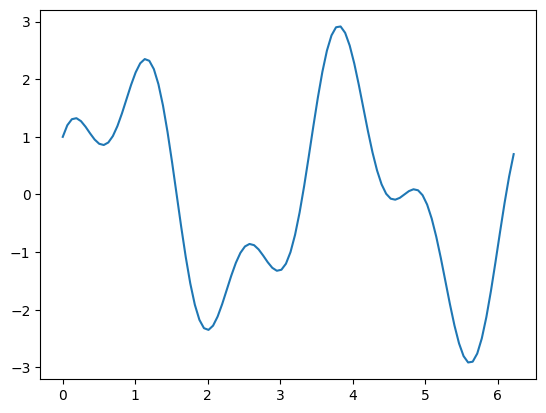

In [4]:
x = np.linspace(0, np.pi * 2, 100, endpoint=False)
y = 0. + 2.*np.sin(x * 2) + np.cos(x * 5 ) #+ np.sin(x * 25.5)

#print (x/(np.pi * 2))

plt.plot(x, y)

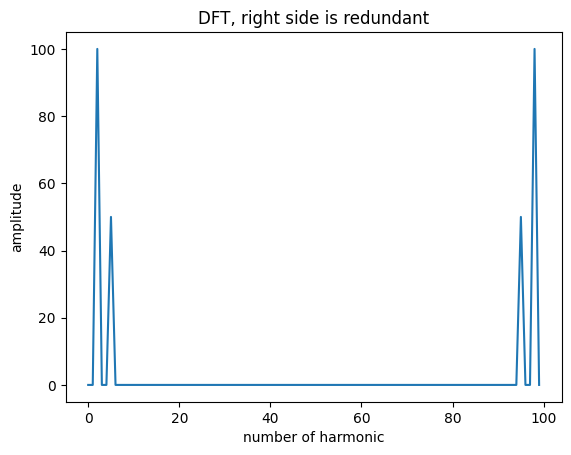

In [5]:
# --------------------------------------------------------------------------------------
#                                                                             Прямое FFT
# --------------------------------------------------------------------------------------

y_fft = fft.fft(y)
plt.title ('DFT, right side is redundant')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot(np.abs(y_fft))

/home/varvara/miniconda3/envs/data_analysis/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/varvara/miniconda3/envs/data_analysis/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


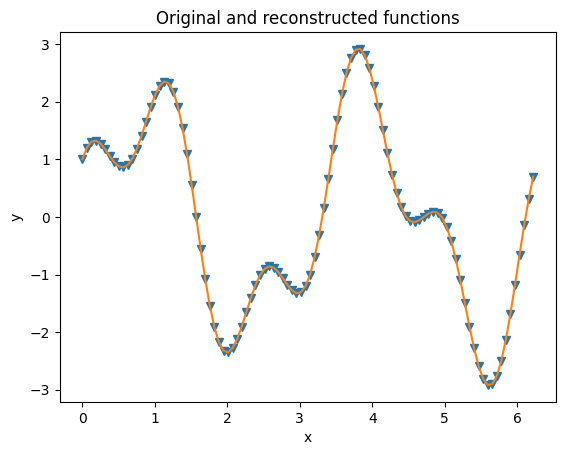

In [6]:
# --------------------------------------------------------------------------------------
#                                                                           обратное FFT
# --------------------------------------------------------------------------------------
from scipy.fftpack import ifft
yf = ifft(y_fft )

plt.figure ()
plt.title ('Original and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x,y, 'v',label='original function' )
plt.plot (x,yf,label='function reconstructed by iDFT')


## Зашумленные данные

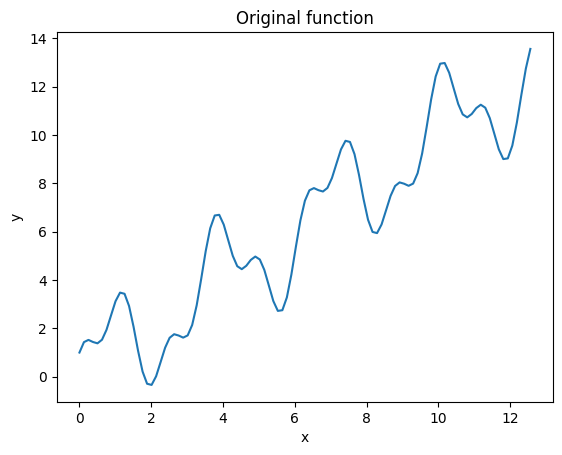

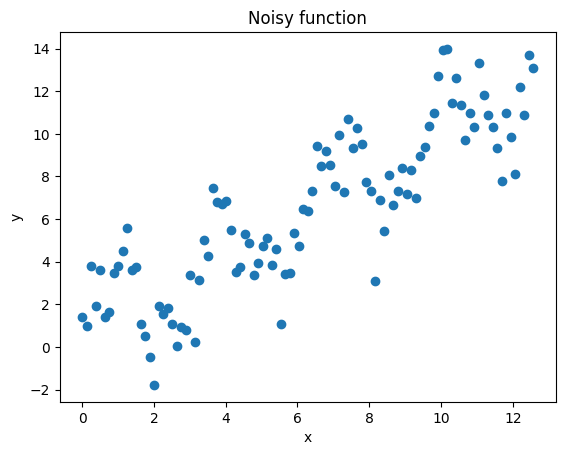

In [7]:
x = np.linspace(0, np.pi * 4, 101)
y = 0. + 2.*np.sin(x * 2) + 1.*np.cos(x * 5 ) # superposition of harmonics 

y = 0. + 2.*np.sin(x * 2) + 1.*np.cos(x * 5 ) + 1.*x # superposition of harmonics plus linear trend

yd = np.zeros(len(x))


plt.title ('Original function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x, y)

Delta = 1.0 * np.random.randn(len(x))
yd = y + Delta

y_av = np.sum(y)/len(x)

plt.figure ()
plt.title ('Noisy function')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x, yd, 'o')

6.373129041982367


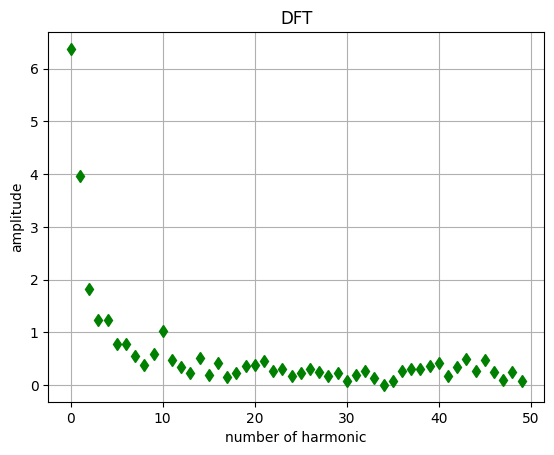

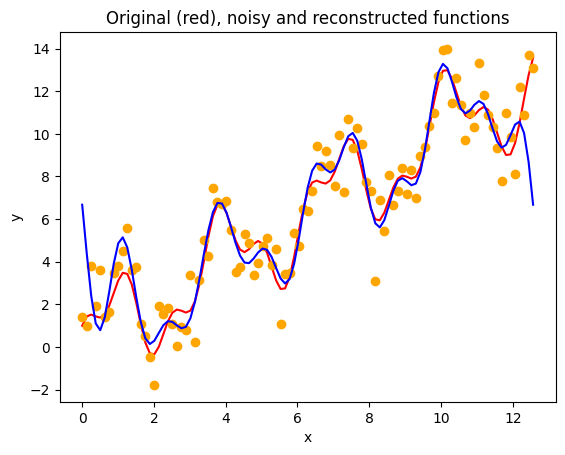

In [8]:
L = max(x) - min(x)
a = np.zeros ((len(x)))
b = np.zeros ((len(x)))
A = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

n = len(x)

dx = L / (n-1)

# --------------------------------------------------------------------------------------
#                                                                 Прямое преобразование
# --------------------------------------------------------------------------------------

a[0] = 1./L * np.sum (yd [:(n-1)]) * dx
b[0] = 0.

print (a[0])

for k in range (1, n-1):
    
    CosTerm = np.cos(2.* np.pi * k * x / L) * dx
    SinTerm =  np.sin(2.* np.pi * k * x / L) * dx
    
    a[k]  = 2./L * np.sum (yd[:(n-1)]*CosTerm [:(n-1)])
    b[k]  = 2./L * np.sum (yd[:(n-1)]*SinTerm [:(n-1)])
           
    A = (a**2+b**2)**(0.5)
    
    #print (a[k], b[k])
    
#print (A)
#print(A[A>1.E-6])



plt.grid ()
plt.title ('DFT')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A[0:int(n/2)], 'd', color='g')

# --------------------------------------------------------------------------------------
#                                                                Обратное преобразование
# --------------------------------------------------------------------------------------

m = int(n/2)

yf = np.zeros (n)

for k in range (0, int(m/4)):
    
    yf += a[k]*np.cos(2.* np.pi * k * x / L) + b[k]*np.sin(2.* np.pi * k * x / L)

    
    
plt.figure ()
plt.title ('Original (red), noisy and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')
plt.plot (x, y, 'r')
plt.plot (x, yd, 'o', color = 'orange')
plt.plot (x,yf, '-', color='b')

### Стандартный подход к разложению 
Гибридный базис для выделения тренда и осциллирующих компонент

## Математическое описание

### 1. **Основные функции Фурье**

Задача разложения функции $y(x)$ на гармоники с использованием базовых функций Фурье может быть представлена следующим образом:

$$
y(x) = \sum_{j=0}^{m} a_j \cos\left( \frac{2\pi j}{L} x \right) + b_j \sin\left( \frac{2\pi j}{L} x \right) + c_0
$$

где:
- $m$ — количество гармоник,
- $L$ — период сигнала,
- $x$ — точки, на которых определяется функция $y(x)$,
- $a_j$ и $b_j$ — коэффициенты амплитуд для косинусных и синусных гармоник соответственно,
- $c_0$ — постоянная компонента (если $k = 1$).

### 2. **Матрица базовых функций $ \Phi $**

В коде создается матрица $ \Phi $, содержащая все базовые функции Фурье для разложения сигнала:
- Для каждой гармоники создаются соответствующие косинусная и синусная функции:

$$
\Phi_j(x) = \cos\left( \frac{2\pi j}{L} x \right) \quad \text{и} \quad \Phi_j(x) = \sin\left( \frac{2\pi j}{L} x \right)
$$

- Линейная компонента (если $k = 2$):

$$
\Phi_1(x) = x
$$

Таким образом, для каждой точки $x$ матрица $ \Phi $ будет содержать как постоянные, так и синусоидальные функции.

### 3. **Решение системы линейных уравнений для коэффициентов**

Для нахождения коэффициентов разложения $a_j$ и $b_j$ решается система линейных уравнений:

$$
\Phi^T \Phi \cdot a = \Phi^T y
$$

где:
- $ \Phi $ — матрица базовых функций,
- $a$ — вектор коэффициентов (коэффициенты для косинусных и синусных гармоник),
- $y$ — вектор значений сигнала, который мы пытаемся разложить.

Решение этой системы даёт коэффициенты разложения $a$, которые минимизируют ошибку между восстановленным и исходным сигналом.

### 4. **Обратное преобразование Фурье**

После нахождения коэффициентов разложения, для восстановления исходного сигнала используется обратное преобразование:

$$
y_{\text{rec}}(x) = \sum_{j=0}^{m} a_j \cos\left( \frac{2\pi j}{L} x \right) + b_j \sin\left( \frac{2\pi j}{L} x \right) + c_0
$$

где $a_j$ и $b_j$ — полученные коэффициенты.

### 5. **Амплитуды гармоник**

Амплитуда каждой гармоники вычисляется как:

$$
A_j = \sqrt{a_j^2 + b_j^2}
$$

где $a_j$ и $b_j$ — коэффициенты перед косинусом и синусом для каждой гармоники.

### 6. **Результат и визуализация**

- **Исходная функция** $y(x)$ сравнивается с восстановленной функцией $y_{\text{rec}}(x)$, показывая, насколько хорошо восстановленный сигнал совпадает с оригинальным.
- **Амплитуды гармоник** визуализируются на графике, что позволяет увидеть, какие частоты (гармоники) наиболее выражены в разложении сигнала.

### Итог

Алгоритм разлагает функцию $y(x)$ на гармоники с помощью базовых функций Фурье, затем решает систему линейных уравнений для нахождения коэффициентов разложения. После этого он восстанавливает сигнал с использованием обратного преобразования Фурье и визуализирует как восстановленную функцию, так и амплитуды главных гармоник.


In [9]:
def BasicFunctionsFourie (m, L, x):
    
    # m - number of harmonics
    # L - main period
    # x - array of data points
    
    n = len(x)
     
    k=1 # if k=1 we have pure DFT
    
    PhiFunArray = np.zeros ((len(x), 2 * m+k)) # Matrix of basic functions
    
    PhiFunArray [:,0] = 1  
    PhiFunArray [:,1] = x # Linear part, applied if k=2
         
    for j in range (1, m+1):
        PhiFunArray [:,2*j+(k-1)-1] = np.cos(2*np.pi*j/L*x)
        PhiFunArray [:,2*j+(k-1)] = np.sin(2*np.pi*j/L*x)
    
    return PhiFunArray

coefficients
[ 6.37312904  0.06747359 -3.96730282  0.13426949 -1.81024859 -0.18689421
 -1.22401042 -0.12319125  1.23171287 -0.18297617 -0.75143239 -0.14954003
 -0.77307924 -0.01479876 -0.5462849  -0.13019772 -0.3518113  -0.08928527
 -0.57536307  0.96954778 -0.34698987  0.00769446 -0.48039349]


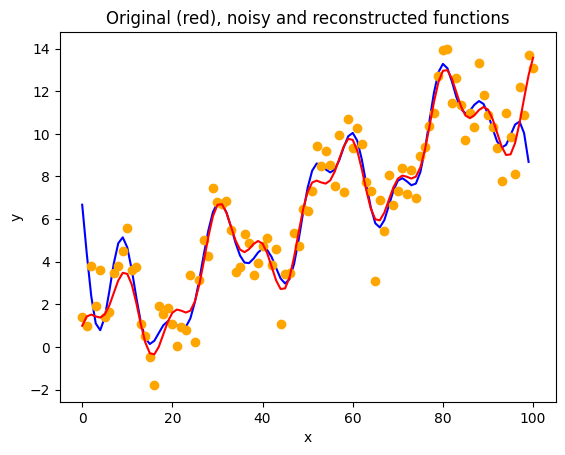

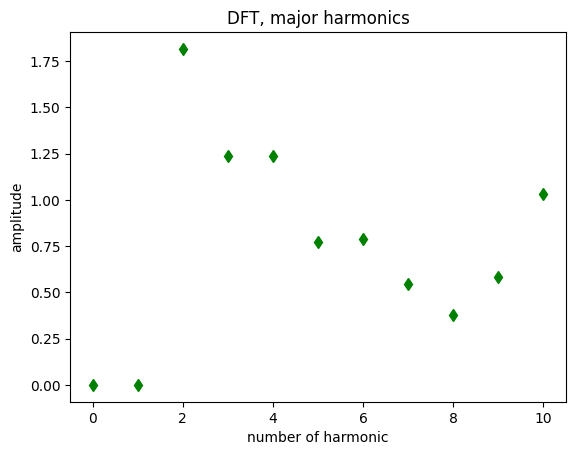

In [10]:
n = len(x)

x1 = x[:n-1] # taking all data points except the last one
y1 = yd[:n-1]

mmax = int(n/2)

m = int(mmax/4)-1 # number of harmonics taking into account 

Phi = BasicFunctionsFourie (m, L, x1) 

#print (Phi)
    
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y1
a = np.linalg.solve(G, z) # getting coefficients of decomposition

print ('coefficients')
print (a)

ma = len (a)

k = ma-m*2 # number of non garmonic terms 

A = np.zeros (m)

for j in range (1, m-1):
    A[j+1] = (a[2*j+k]**2+a[2*j+k+1]**2)**0.5 # calculating amplitudes
    
w = Phi@a # inverse transformation

plt.title ('Original (red), noisy and reconstructed functions')
plt.ylabel('y')
plt.xlabel('x')    
plt.plot(w, 'b')
plt.plot(yd, 'o', color='orange')
plt.plot(y, '-', color='r')

plt.figure ()

plt.title ('DFT, major harmonics')
plt.xlabel('number of harmonic')
plt.ylabel('amplitude')
plt.plot (A, 'd', color='green') 

## numpy.fft

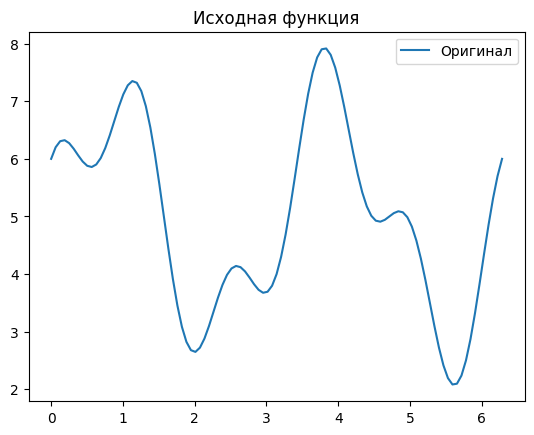

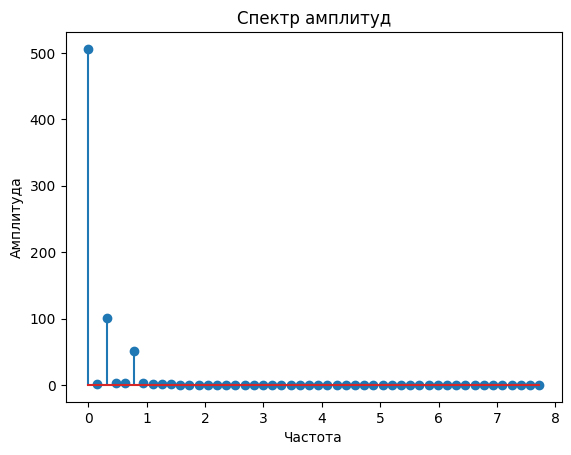

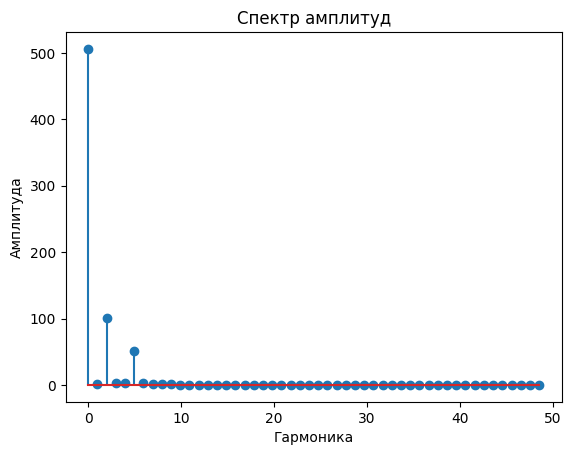

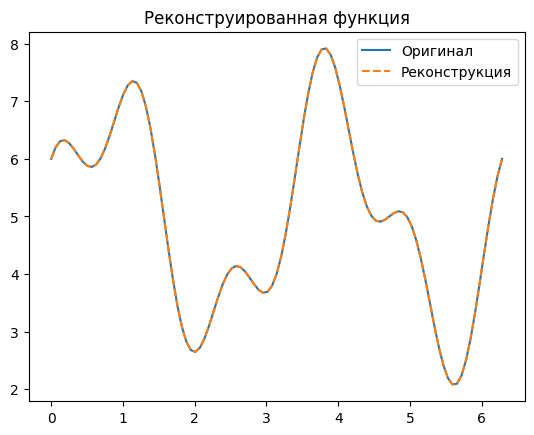

In [11]:
# Исходные данные
x = np.linspace(0, np.pi * 2, 101)
y = 2 * np.sin(x * 2) + np.cos(x * 5) + 5

# FFT и обратное преобразование
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(y), d=(x[1]-x[0]))
amplitudes = np.abs(Y)

# Номер гармоники
k = freqs * np.pi * 2

# Реконструированная функция
y_reconstructed = fft.ifft(Y)

# Графики
plt.figure()
plt.title("Исходная функция")
plt.plot(x, y, label="Оригинал")
plt.legend()

plt.figure()
plt.title("Спектр амплитуд")
plt.stem(freqs[:len(freqs)//2], amplitudes[:len(amplitudes)//2])
plt.xlabel("Частота")
plt.ylabel("Амплитуда")

plt.figure()
plt.title("Спектр амплитуд")
plt.stem(k[:len(k)//2], amplitudes[:len(amplitudes)//2])
plt.xlabel("Гармоника")
plt.ylabel("Амплитуда")

plt.figure()
plt.title("Реконструированная функция")
plt.plot(x, y, label="Оригинал")
plt.plot(x, y_reconstructed.real, '--', label="Реконструкция")
plt.legend()

plt.show()


## Работа на зашумленных данных

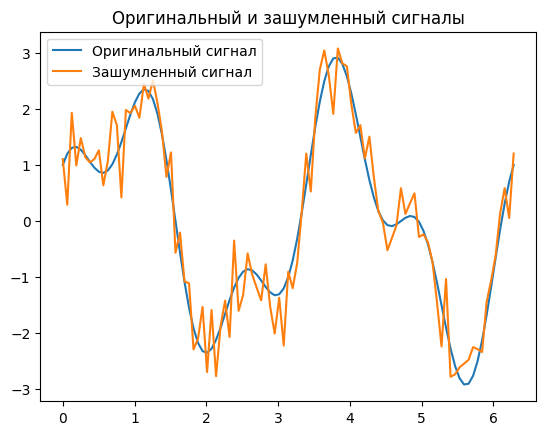

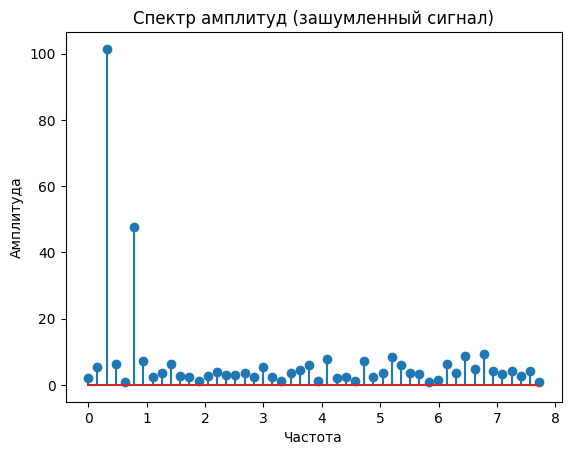

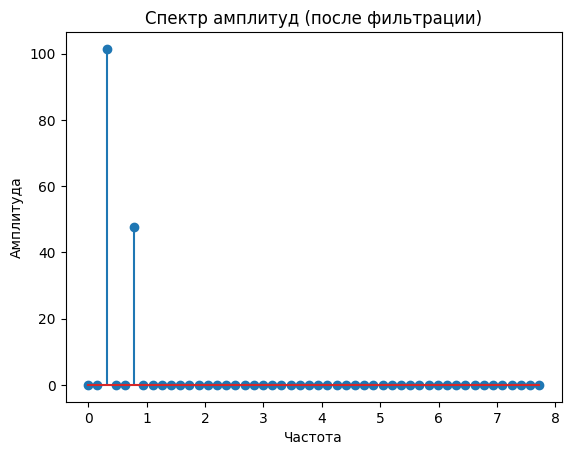

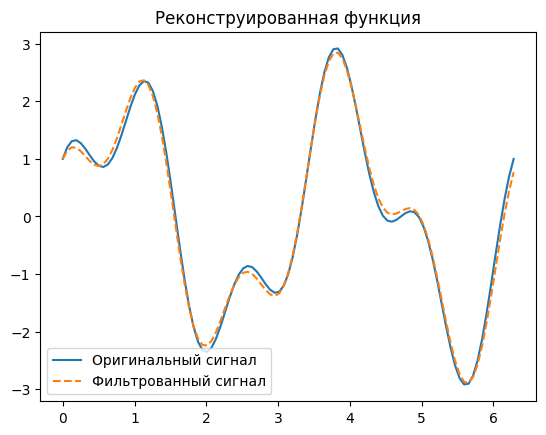

In [12]:
# Данные
x = np.linspace(0, np.pi * 2, 101)
y = 2 * np.sin(x * 2) + np.cos(x * 5)

# Добавляем шум
noise = np.random.normal(0, 0.5, size=y.shape)  # шум с нормальным распределением
y_noisy = y + noise

# FFT
Y_noisy = np.fft.fft(y_noisy)
freqs_noisy = np.fft.fftfreq(len(y_noisy), d=(x[1] - x[0]))
amplitudes_noisy = np.abs(Y_noisy)

# Фильтрация
threshold = 20  # Порог для амплитуды
Y_filtered = Y_noisy.copy()
Y_filtered[amplitudes_noisy < threshold] = 0

# Обратное преобразование
y_filtered = np.fft.ifft(Y_filtered)

# Графики
plt.figure()
plt.title("Оригинальный и зашумленный сигналы")
plt.plot(x, y, label="Оригинальный сигнал")
plt.plot(x, y_noisy, label="Зашумленный сигнал")
plt.legend()

plt.figure()
plt.title("Спектр амплитуд (зашумленный сигнал)")
plt.stem(freqs_noisy[:len(freqs_noisy) // 2], amplitudes_noisy[:len(amplitudes_noisy) // 2])
plt.xlabel("Частота")
plt.ylabel("Амплитуда")

plt.figure()
plt.title("Спектр амплитуд (после фильтрации)")
plt.stem(freqs_noisy[:len(freqs_noisy) // 2], np.abs(Y_filtered)[:len(Y_filtered) // 2])
plt.xlabel("Частота")
plt.ylabel("Амплитуда")

plt.figure()
plt.title("Реконструированная функция")
plt.plot(x, y, label="Оригинальный сигнал")
plt.plot(x, y_filtered.real, '--', label="Фильтрованный сигнал")
plt.legend()

plt.show()


## Добавление тренда


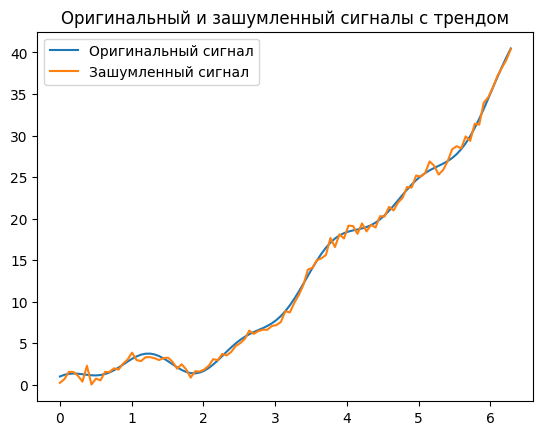

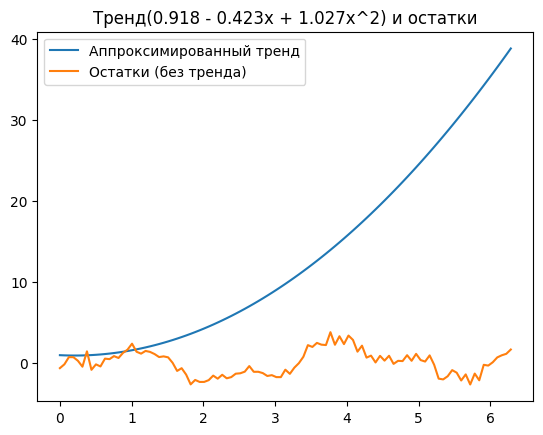

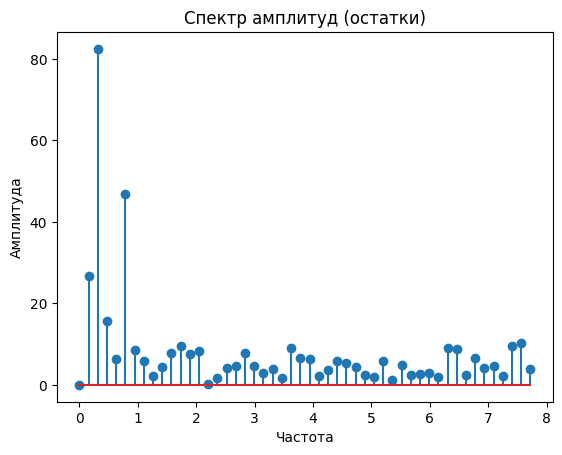

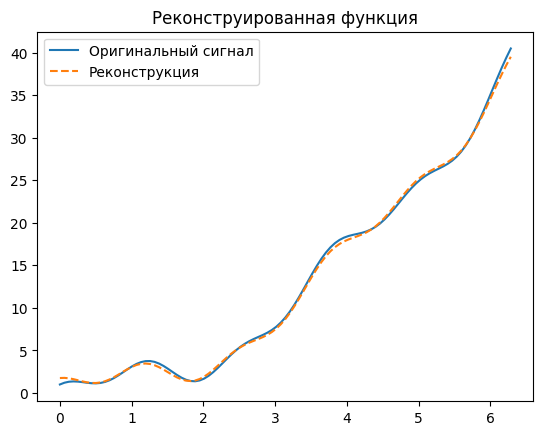

In [13]:
from numpy.polynomial.polynomial import Polynomial

# Исходные данные с трендом
x = np.linspace(0, np.pi * 2, 101)
y_trend = 2 * np.sin(x * 2) + np.cos(x * 5) + x * x

# Добавляем шум
noise = np.random.normal(0, 0.5, size=y_trend.shape)
y_trend_noisy = y_trend + noise

# 1. Аппроксимация тренда
poly_degree = 2  # Степень полинома для тренда
trend_poly = Polynomial.fit(x, y_trend_noisy, poly_degree)
# trend_poly = Polynomial([0, 0, 1])
trend = trend_poly(x)

coefs = trend_poly.convert().coef
terms = [f"{coef:.3f}x^{i}" if i > 0 else f"{coef:.3f}" 
            for i, coef in enumerate(coefs)]
equation = " + ".join(terms).replace("x^1", "x").replace("+ -", "- ")

# Убираем тренд
y_detrended = y_trend_noisy - trend

# 2. FFT на остатке
Y_detrended = np.fft.fft(y_detrended)
freqs_detrended = np.fft.fftfreq(len(y_detrended), d=(x[1] - x[0]))
amplitudes_detrended = np.abs(Y_detrended)

# Фильтрация частот
threshold = 20
Y_filtered = Y_detrended.copy()
Y_filtered[amplitudes_detrended < threshold] = 0

# Реконструкция сигнала
y_filtered = np.fft.ifft(Y_filtered).real

# Восстановление полной функции
y_reconstructed = y_filtered + trend

# Графики
plt.figure()
plt.title("Оригинальный и зашумленный сигналы с трендом")
plt.plot(x, y_trend, label="Оригинальный сигнал")
plt.plot(x, y_trend_noisy, label="Зашумленный сигнал")
plt.legend()

plt.figure()
plt.title(f"Тренд({equation}) и остатки")
plt.plot(x, trend, label="Аппроксимированный тренд")
plt.plot(x, y_detrended, label="Остатки (без тренда)")
plt.legend()

plt.figure()
plt.title("Спектр амплитуд (остатки)")
plt.stem(freqs_detrended[:len(freqs_detrended) // 2], amplitudes_detrended[:len(amplitudes_detrended) // 2])
plt.xlabel("Частота")
plt.ylabel("Амплитуда")

plt.figure()
plt.title("Реконструированная функция")
plt.plot(x, y_trend, label="Оригинальный сигнал")
plt.plot(x, y_reconstructed, '--', label="Реконструкция")
plt.legend()

plt.show()


Тренд — это долгосрочная (или медленно меняющаяся) составляющая сигнала, которая описывает общую тенденцию данных.



Прямое преобразование Фурье (FFT — Fast Fourier Transform) позволяет разложить сигнал на его частотные составляющие, выраженные как сумма синусоид и косинусоид с разными частотами, амплитудами и фазами.

Результатом преобразования является спектр частот — набор амплитуд и фаз для каждой частоты, которые описывают сигнал.